In [1]:
import pandas as pd

# 读取Excel文件
df = pd.read_excel('4-2汇总.xlsx')

# 将数据保存为CSV文件
df.to_csv('4-2汇总.csv', index=False, encoding='utf-8')

/home/sszu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sszu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sszu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sszu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sszu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.

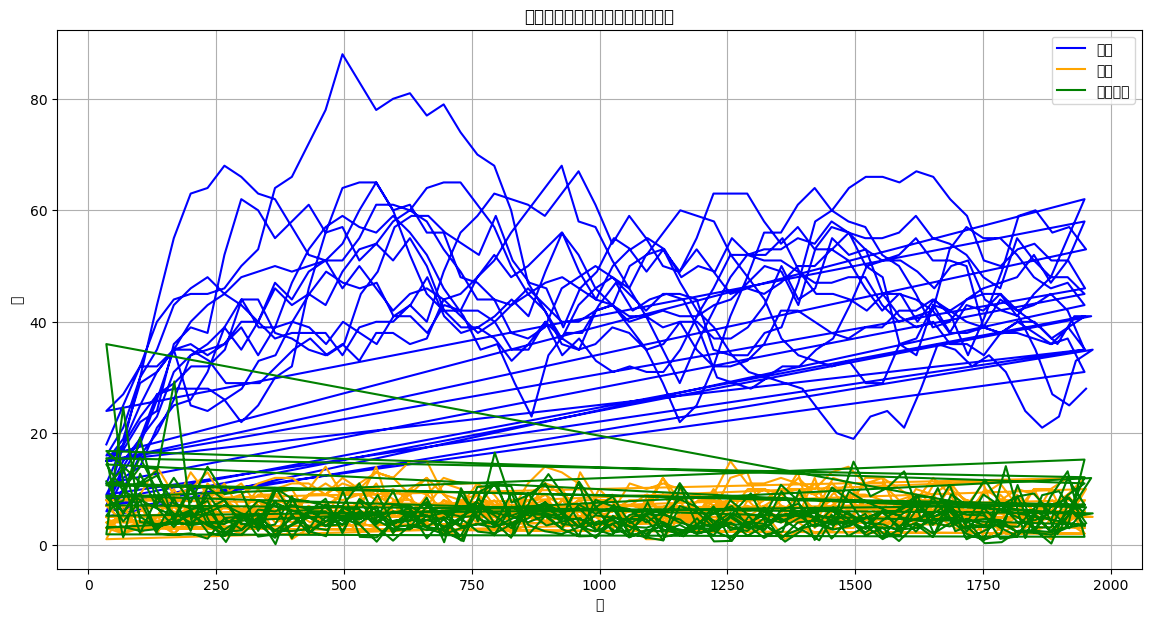

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('4-2汇总.csv')

# 设置时间索引（假设帧是时间序列）
data.set_index('帧', inplace=True)

# 绘制流量、密度和平均速度的时序图
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['流量'], label='流量', color='blue')
plt.plot(data.index, data['密度'], label='密度', color='orange')
plt.plot(data.index, data['平均速度'], label='平均速度', color='green')

# 添加标题和标签
plt.title('流量、密度和平均速度的时序分析')
plt.xlabel('帧')
plt.ylabel('值')
plt.legend()
plt.grid()

# 显示图形
plt.show()

In [2]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# 读取CSV文件
data = pd.read_csv('4-2汇总.csv')

# 设置时间索引
data.set_index('帧', inplace=True)

# 选择要分析的列
test_data = data[['流量', '密度', '平均速度']]

# Granger因果关系检验
max_lag = 5  # 最大滞后期
results = grangercausalitytests(test_data[['流量', '密度']], max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=53.0854 , p=0.0000  , df_denom=763, df_num=1
ssr based chi2 test:   chi2=53.2941 , p=0.0000  , df=1
likelihood ratio test: chi2=51.5219 , p=0.0000  , df=1
parameter F test:         F=53.0854 , p=0.0000  , df_denom=763, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=28.9071 , p=0.0000  , df_denom=760, df_num=2
ssr based chi2 test:   chi2=58.1946 , p=0.0000  , df=2
likelihood ratio test: chi2=56.0873 , p=0.0000  , df=2
parameter F test:         F=28.9071 , p=0.0000  , df_denom=760, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=21.6086 , p=0.0000  , df_denom=757, df_num=3
ssr based chi2 test:   chi2=65.4252 , p=0.0000  , df=3
likelihood ratio test: chi2=62.7742 , p=0.0000  , df=3
parameter F test:         F=21.6086 , p=0.0000  , df_denom=757, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=16.9039 , p=0.0000  

/home/sszu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Adjusted Rand Index (ARI): -0.0017554799172303133


/home/sszu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sszu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sszu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sszu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sszu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRA

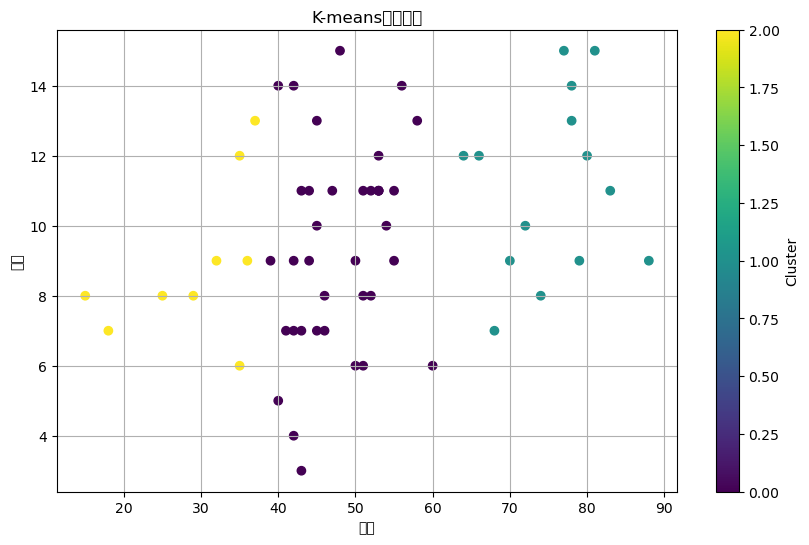

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('4-2汇总.csv')

# 截取前60行数据
data = data.head(60)

# 选择要分析的列
test_data = data[['流量', '密度', '平均速度']]

# K-means聚类
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(test_data)

# 假设真实标签（可以根据实际情况替换）
true_labels = np.random.randint(0, 3, size=len(test_data))  # 这里随机生成真实标签

# 计算ARI
ari_score = adjusted_rand_score(true_labels, clusters)
print(f'Adjusted Rand Index (ARI): {ari_score}')

# 可视化聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(test_data['流量'], test_data['密度'], c=clusters, cmap='viridis', marker='o')
plt.title('K-means聚类结果')
plt.xlabel('流量')
plt.ylabel('密度')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

/tmp/ipykernel_163334/3554774790.py:56: UserWarning: Glyph 28382 (\N{CJK UNIFIED IDEOGRAPH-6EDE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_163334/3554774790.py:56: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_163334/3554774790.py:56: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_163334/3554774790.py:56: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_163334/3554774790.py:56: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_163334/3554774790.py:56: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_163334/3554774790.py:56: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.

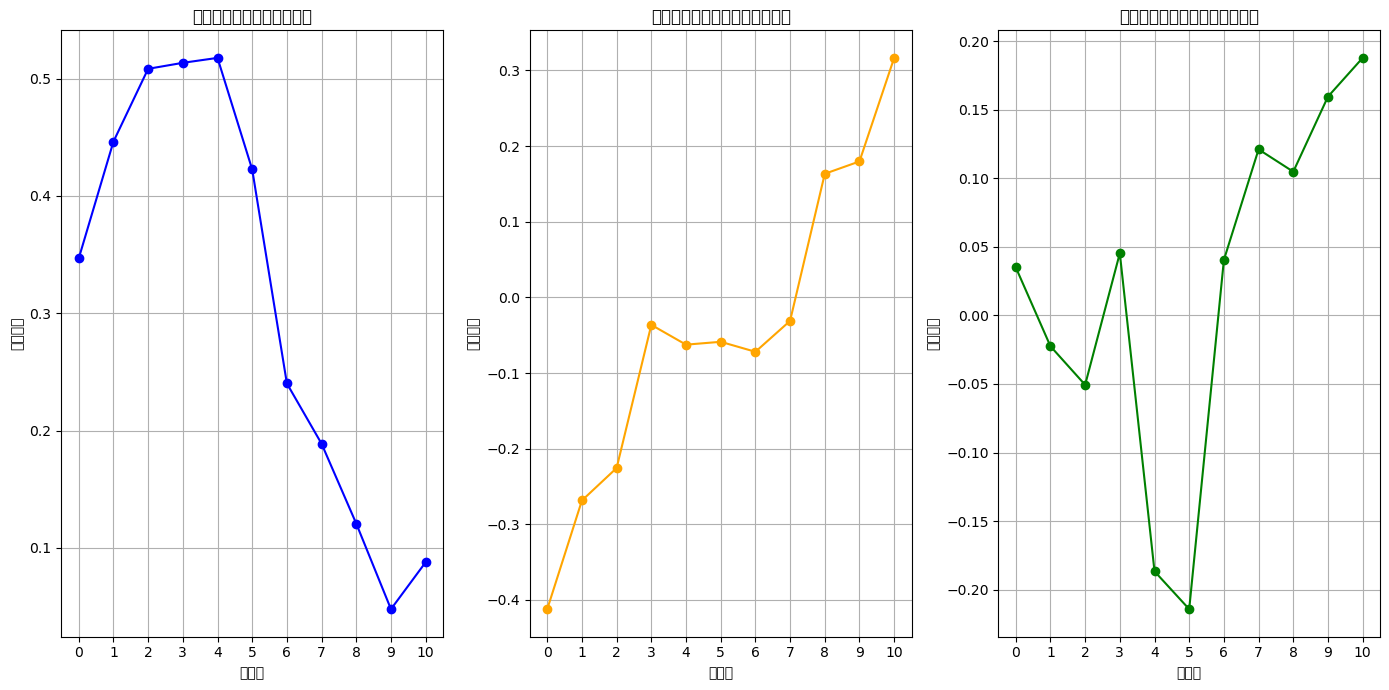

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('4-2汇总.csv')

# 截取前60行数据
data = data.head(60)

# 设置时间索引
data.set_index('帧', inplace=True)

# 计算平均延后系数
def average_run_length(series1, series2, max_lag):
    correlations = [series1.corr(series2.shift(lag)) for lag in range(max_lag + 1)]
    return correlations

max_lag = 10  # 最大滞后期
ari_flow_density = average_run_length(data['流量'], data['密度'], max_lag)
ari_flow_speed = average_run_length(data['流量'], data['平均速度'], max_lag)
ari_density_speed = average_run_length(data['密度'], data['平均速度'], max_lag)

# 可视化平均延后系数
lags = list(range(max_lag + 1))

plt.figure(figsize=(14, 7))

# 流量与密度
plt.subplot(1, 3, 1)
plt.plot(lags, ari_flow_density, marker='o', label='流量与密度', color='blue')
plt.title('流量与密度的平均延后系数')
plt.xlabel('滞后期')
plt.ylabel('相关系数')
plt.xticks(lags)
plt.grid()

# 流量与平均速度
plt.subplot(1, 3, 2)
plt.plot(lags, ari_flow_speed, marker='o', label='流量与平均速度', color='orange')
plt.title('流量与平均速度的平均延后系数')
plt.xlabel('滞后期')
plt.ylabel('相关系数')
plt.xticks(lags)
plt.grid()

# 密度与平均速度
plt.subplot(1, 3, 3)
plt.plot(lags, ari_density_speed, marker='o', label='密度与平均速度', color='green')
plt.title('密度与平均速度的平均延后系数')
plt.xlabel('滞后期')
plt.ylabel('相关系数')
plt.xticks(lags)
plt.grid()

plt.tight_layout()
plt.show()

/home/sszu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
Font 'default' does not have a glyph for '\u6d41' [U+6d41], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u91cf' [U+91cf], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5bc6' [U+5bc6], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5ea6' [U+5ea6], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6d41' [U+6d41], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u91cf' [U+91cf], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e73' [U+5e73], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5747' [U+5747], substituting with a dummy symbol.
Font 'default' does not have a glyph

ADF检验p值： {'流量': 0.666913928828488, '密度': 0.00032196767459611095, '平均速度': 0.018694634556261955}
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 23, Sep, 2024
Time:                     11:22:42
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    8.91654
Nobs:                     54.0000    HQIC:                   7.83040
Log likelihood:          -374.879    FPE:                    1344.13
AIC:                      7.14855    Det(Omega_mle):         617.062
--------------------------------------------------------------------
Results for equation 流量
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.333271         0.694214           -0.480           0.631
L1.流量           0.250781         0.173550            1.445         

Font 'default' does not have a glyph for '\u5bc6' [U+5bc6], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5ea6' [U+5ea6], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e73' [U+5e73], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5747' [U+5747], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901f' [U+901f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5ea6' [U+5ea6], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5bc6' [U+5bc6], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6d41' [U+6d41], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u91cf' [U+91cf], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e73' [U+5e73], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5747' [U+5747], 

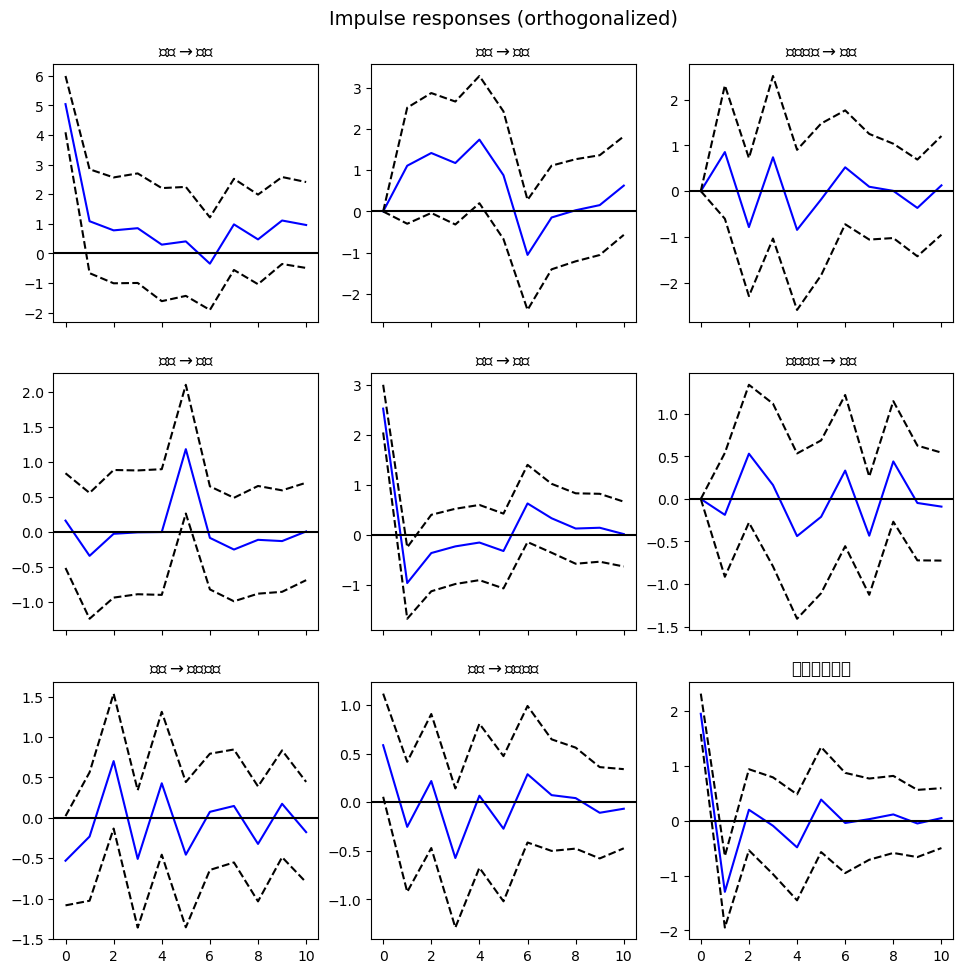

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

# 读取CSV文件
data = pd.read_csv('4-2汇总.csv')

# 截取前60行数据
data = data.head(60)

# 选择要分析的列
test_data = data[['流量', '密度', '平均速度']]

# 平稳性检验
def adf_test(series):
    result = adfuller(series)
    return result[1]  # 返回p值

# 检验每列的平稳性
p_values = {col: adf_test(test_data[col]) for col in test_data.columns}
print("ADF检验p值：", p_values)

# 如果p值大于0.05，序列不平稳，需要进行差分
if any(p > 0.05 for p in p_values.values()):
    test_data_diff = test_data.diff().dropna()
else:
    test_data_diff = test_data

# 拟合VAR模型
model = VAR(test_data_diff)
results = model.fit(maxlags=5)

# 查看模型摘要
print(results.summary())

# 脉冲响应分析
irf = results.irf(10)
irf.plot(orth=True)
plt.title('脉冲响应分析')
plt.show()

/home/sszu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.


ADF检验p值： {'x': 0.666913928828488, 'y': 0.00032196767459611095, 'z': 0.018694634556261955}
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 23, Sep, 2024
Time:                     11:31:37
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    10.5377
Nobs:                     49.0000    HQIC:                   8.30939
Log likelihood:          -285.788    FPE:                    2051.17
AIC:                      6.94712    Det(Omega_mle):         471.324
--------------------------------------------------------------------
Results for equation x
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.681293         0.789860           -0.863           0.388
L1.x          0.028790         0.262390            0.110           0.913
L1.y  

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

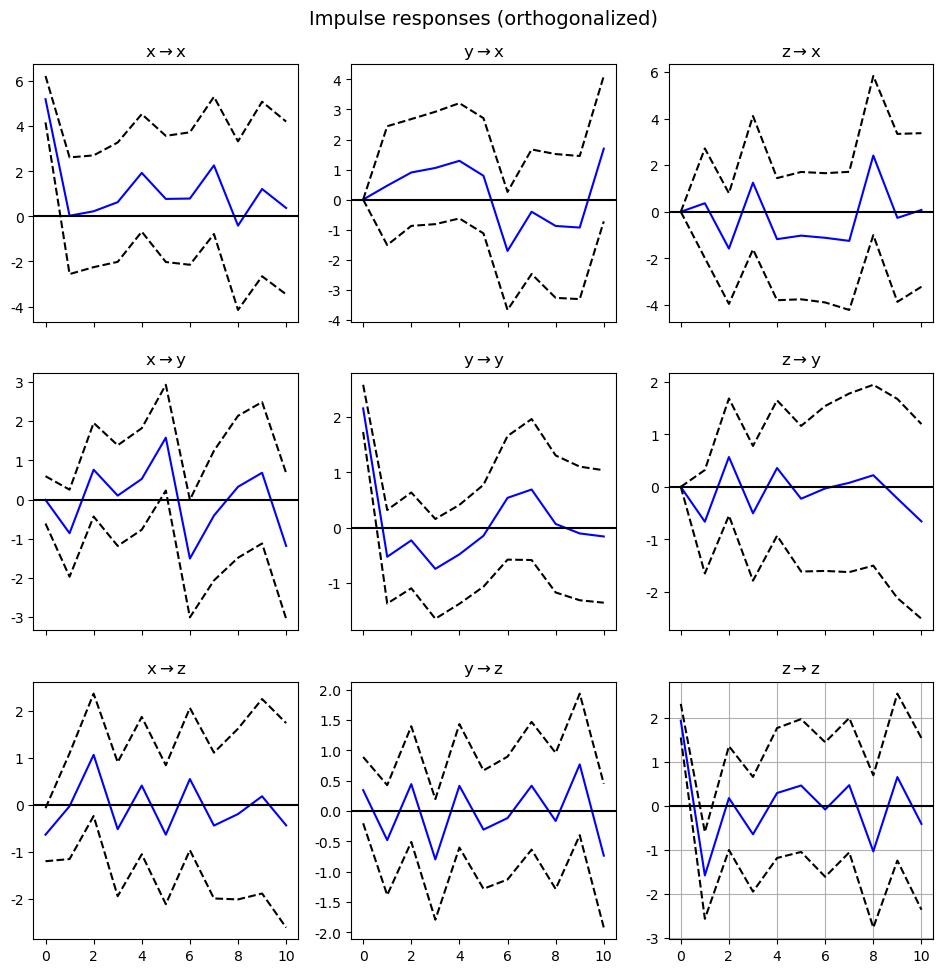

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import matplotlib
plt.rcParams['font.sans-serif'] = ['SimHei']

# 读取CSV文件
data = pd.read_csv('4-2汇总.csv')

# 截取前60行数据
data = data.head(60)

# 选择要分析的列并重命名
data.rename(columns={'流量': 'x', '密度': 'y', '平均速度': 'z'}, inplace=True)

# 选择要分析的列
test_data = data[['x', 'y', 'z']]

# 平稳性检验
def adf_test(series):
    result = adfuller(series)
    return result[1]  # 返回p值

# 检验每列的平稳性
p_values = {col: adf_test(test_data[col]) for col in test_data.columns}
print("ADF检验p值：", p_values)

# 如果p值大于0.05，序列不平稳，需要进行差分
if any(p > 0.05 for p in p_values.values()):
    test_data_diff = test_data.diff().dropna()
else:
    test_data_diff = test_data

# 拟合VAR模型
model = VAR(test_data_diff)
results = model.fit(maxlags=10)

# 查看模型摘要
print(results.summary())

# 脉冲响应分析
irf = results.irf(10)
irf.plot(orth=True)
# plt.title('脉冲响应分析')
# plt.xlabel('滞后期')
# plt.ylabel('响应')
plt.grid()
plt.show()

/home/sszu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' n

ADF检验p值： {'x': 0.666913928828488, 'y': 0.00032196767459611095, 'z': 0.018694634556261955}
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 23, Sep, 2024
Time:                     11:33:25
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    8.91654
Nobs:                     54.0000    HQIC:                   7.83040
Log likelihood:          -374.879    FPE:                    1344.13
AIC:                      7.14855    Det(Omega_mle):         617.062
--------------------------------------------------------------------
Results for equation x
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.333271         0.694214           -0.480           0.631
L1.x          0.250781         0.173550            1.445           0.148
L1.y  

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

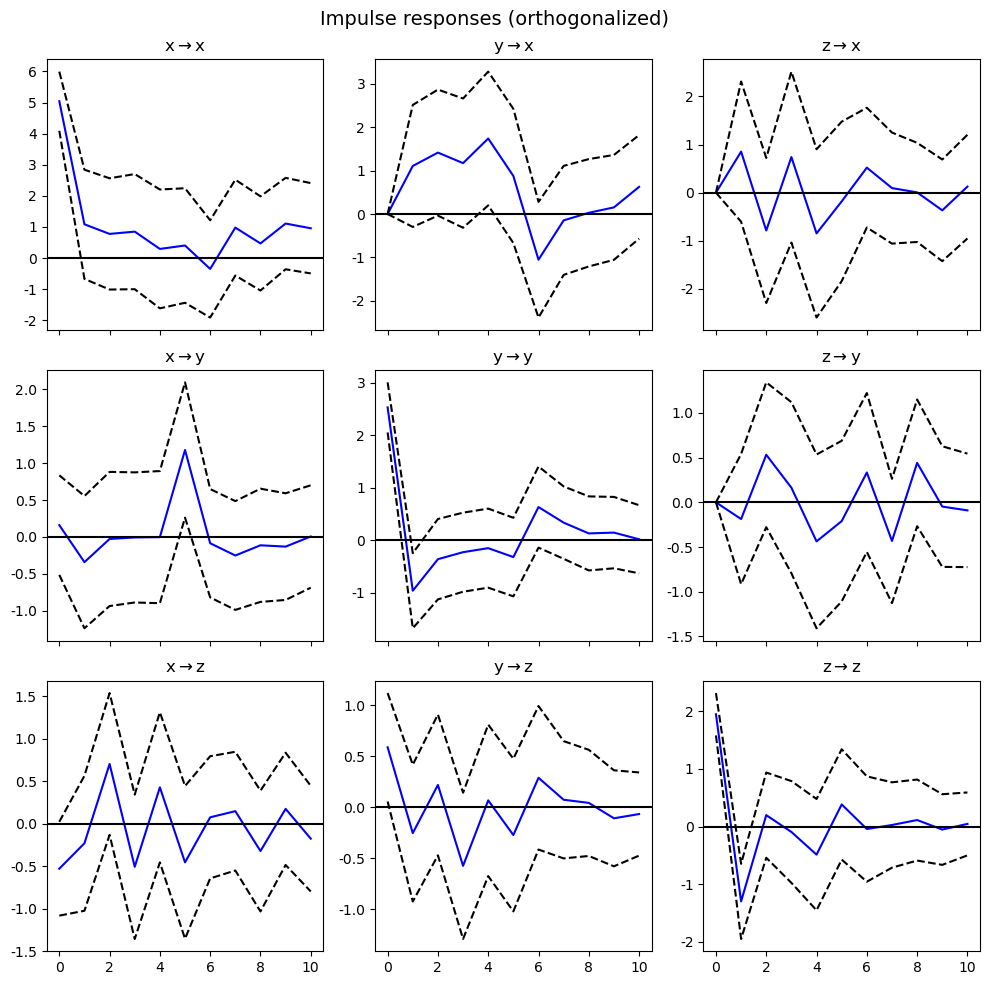

ValueError: Must pass 2-d input. shape=(11, 3, 3)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import matplotlib

# 设置字体为支持中文的字体
matplotlib.rcParams['font.family'] = 'SimHei'  # 使用黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取CSV文件
data = pd.read_csv('4-2汇总.csv')

# 截取前60行数据
data = data.head(60)

# 选择要分析的列并重命名
data.rename(columns={'流量': 'x', '密度': 'y', '平均速度': 'z'}, inplace=True)

# 选择要分析的列
test_data = data[['x', 'y', 'z']]

# 平稳性检验
def adf_test(series):
    result = adfuller(series)
    return result[1]  # 返回p值

# 检验每列的平稳性
p_values = {col: adf_test(test_data[col]) for col in test_data.columns}
print("ADF检验p值：", p_values)

# 将ADF检验结果保存到CSV文件
adf_results_df = pd.DataFrame(p_values.items(), columns=['变量', 'p值'])
adf_results_df.to_csv('adf检验结果.csv', index=False)

# 如果p值大于0.05，序列不平稳，需要进行差分
if any(p > 0.05 for p in p_values.values()):
    test_data_diff = test_data.diff().dropna()
else:
    test_data_diff = test_data

# 拟合VAR模型
model = VAR(test_data_diff)
results = model.fit(maxlags=5)

# 查看模型摘要
summary_df = results.summary()
print(summary_df)

# 将VAR模型摘要保存到文本文件
with open('var模型摘要.txt', 'w') as f:
    f.write(str(summary_df))

# 脉冲响应分析
irf = results.irf(10)

# 绘制脉冲响应图
fig = irf.plot(orth=True)
# plt.title('脉冲响应分析', fontsize=16)
# plt.xlabel('滞后期', fontsize=12)
# plt.ylabel('响应', fontsize=12)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

# 保存脉冲响应结果
irf_data = irf.orth_irfs
irf_df = pd.DataFrame(irf_data, columns=['x', 'y', 'z'], index=range(1, irf_data.shape[0] + 1))
irf_df.to_csv('脉冲响应结果.csv', index_label='滞后期')

/home/sszu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/sszu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/sszu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/sszu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not fou

ADF检验p值： {'x': 0.666913928828488, 'y': 0.00032196767459611095, 'z': 0.018694634556261955}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5823  , p=0.4487  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=0.6141  , p=0.4333  , df=1
likelihood ratio test: chi2=0.6108  , p=0.4345  , df=1
parameter F test:         F=0.5823  , p=0.4487  , df_denom=55, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6325  , p=0.5353  , df_denom=52, df_num=2
ssr based chi2 test:   chi2=1.3867  , p=0.4999  , df=2
likelihood ratio test: chi2=1.3701  , p=0.5041  , df=2
parameter F test:         F=0.6325  , p=0.5353  , df_denom=52, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6405  , p=0.5926  , df_denom=49, df_num=3
ssr based chi2 test:   chi2=2.1960  , p=0.5327  , df=3
likelihood ratio test: chi2=2.1540  , p=0.5411  , df=3
parameter F test:         F=0.6405  , p=0.5926  , df_denom=49, df_num=3

Granger C

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_163334/3012660252.py:59: UserWarning: Glyph 28382 (\N{CJK UNIFIED IDEOGRAPH-6EDE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_163334/3012660252.py:59: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_163334/3012660252.py:59: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_163334/3012660252.py:59: UserWarning: Glyph 21709 (\N{CJK UNIFIED IDEOGRAPH-54CD}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_163334/3012660252.py:59: UserWarning: Glyph 24212 (\N{CJK UNIFIED IDEOGRAPH-5E94}) missing from current font.
  plt.tight_layout()
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_163

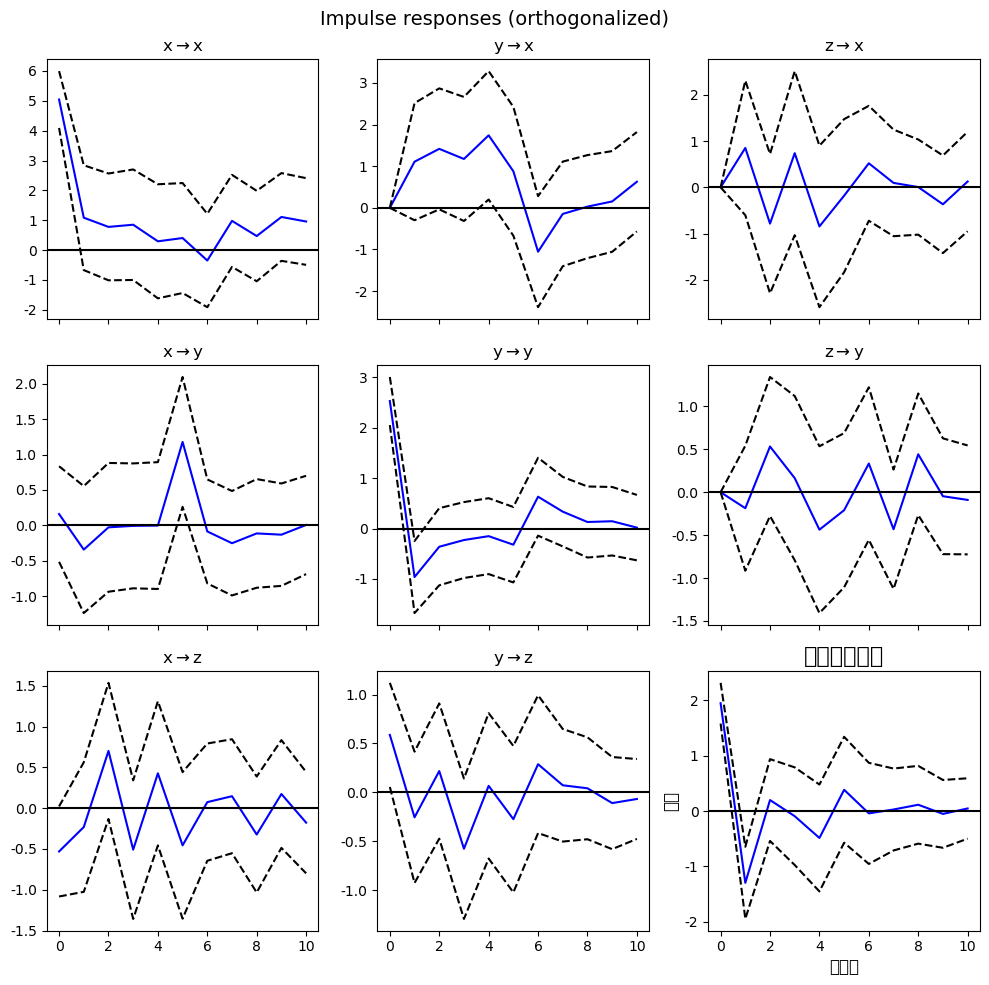

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.api import VAR
import matplotlib

# 设置字体为支持中文的字体
matplotlib.rcParams['font.family'] = 'SimHei'  # 使用黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取CSV文件
data = pd.read_csv('4-2汇总.csv')

# 截取前60行数据
data = data.head(60)

# 选择要分析的列并重命名
data.rename(columns={'流量': 'x', '密度': 'y', '平均速度': 'z'}, inplace=True)

# 选择要分析的列
test_data = data[['x', 'y', 'z']]

# 平稳性检验
def adf_test(series):
    result = adfuller(series)
    return result[1]  # 返回p值

# 检验每列的平稳性
p_values = {col: adf_test(test_data[col]) for col in test_data.columns}
print("ADF检验p值：", p_values)

# 如果p值大于0.05，序列不平稳，需要进行差分
if any(p > 0.05 for p in p_values.values()):
    test_data_diff = test_data.diff().dropna()
else:
    test_data_diff = test_data

# Granger因果性检验
max_lag = 5  # 最大滞后期
results_xy = grangercausalitytests(test_data_diff[['x', 'y']], max_lag, verbose=True)
results_xz = grangercausalitytests(test_data_diff[['x', 'z']], max_lag, verbose=True)
results_yz = grangercausalitytests(test_data_diff[['y', 'z']], max_lag, verbose=True)

# 拟合VAR模型
model = VAR(test_data_diff)
results = model.fit(maxlags=5)

# 脉冲响应分析
irf = results.irf(10)

# 绘制脉冲响应图
fig = irf.plot(orth=True)
plt.title('脉冲响应分析', fontsize=16)
plt.xlabel('滞后期', fontsize=12)
plt.ylabel('响应', fontsize=12)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

/home/sszu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/sszu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/sszu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.


ADF检验p值： {'x': 0.666913928828488, 'y': 0.00032196767459611095, 'z': 0.018694634556261955}


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

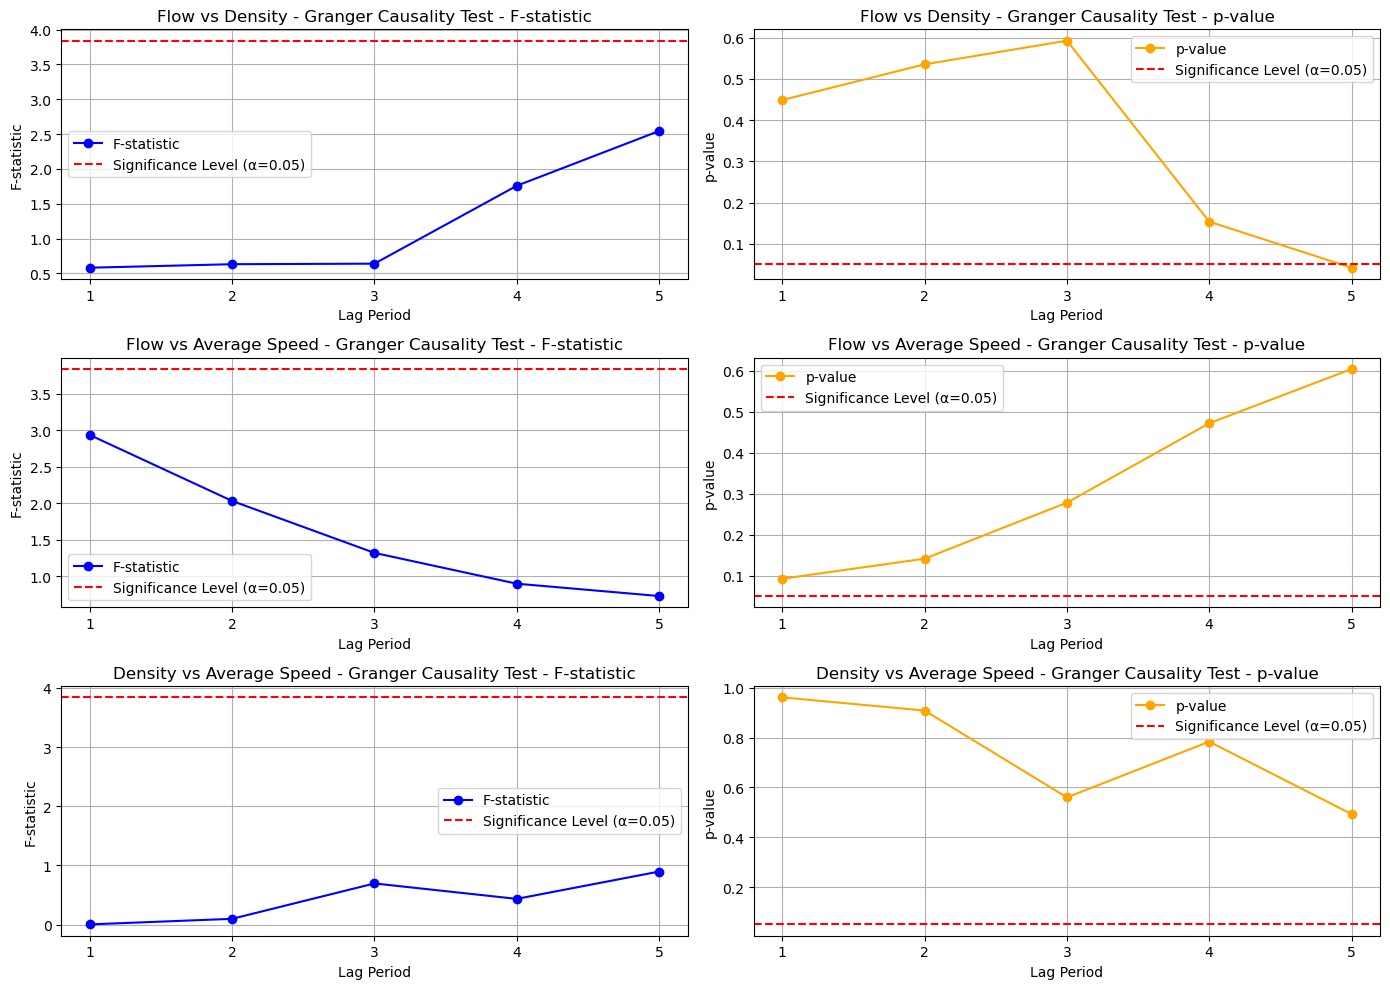

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.api import VAR
import matplotlib

# 设置字体为支持中文的字体
matplotlib.rcParams['font.family'] = 'SimHei'  # 使用黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取CSV文件
data = pd.read_csv('4-2汇总.csv')

# 截取前60行数据
data = data.head(60)

# 选择要分析的列并重命名
data.rename(columns={'流量': 'x', '密度': 'y', '平均速度': 'z'}, inplace=True)

# 选择要分析的列
test_data = data[['x', 'y', 'z']]

# 平稳性检验
def adf_test(series):
    result = adfuller(series)
    return result[1]  # 返回p值

# 检验每列的平稳性
p_values = {col: adf_test(test_data[col]) for col in test_data.columns}
print("ADF检验p值：", p_values)

# 如果p值大于0.05，序列不平稳，需要进行差分
if any(p > 0.05 for p in p_values.values()):
    test_data_diff = test_data.diff().dropna()
else:
    test_data_diff = test_data

# Granger因果性检验
max_lag = 5  # 最大滞后期
results_xy = grangercausalitytests(test_data_diff[['x', 'y']], max_lag, verbose=False)
results_xz = grangercausalitytests(test_data_diff[['x', 'z']], max_lag, verbose=False)
results_yz = grangercausalitytests(test_data_diff[['y', 'z']], max_lag, verbose=False)

# 提取F统计量和p值
lags = list(range(1, max_lag + 1))
f_stats_xy = [results_xy[i + 1][0]['ssr_ftest'][0] for i in range(max_lag)]
p_values_xy = [results_xy[i + 1][0]['ssr_ftest'][1] for i in range(max_lag)]

f_stats_xz = [results_xz[i + 1][0]['ssr_ftest'][0] for i in range(max_lag)]
p_values_xz = [results_xz[i + 1][0]['ssr_ftest'][1] for i in range(max_lag)]

f_stats_yz = [results_yz[i + 1][0]['ssr_ftest'][0] for i in range(max_lag)]
p_values_yz = [results_yz[i + 1][0]['ssr_ftest'][1] for i in range(max_lag)]

# 可视化F统计量和p值
plt.figure(figsize=(14, 10))

# Flow vs Density
plt.subplot(3, 2, 1)
plt.plot(lags, f_stats_xy, marker='o', label='F-statistic', color='blue')
plt.axhline(y=3.84, color='r', linestyle='--', label='Significance Level (α=0.05)')
plt.title('Flow vs Density - Granger Causality Test - F-statistic')
plt.xlabel('Lag Period')
plt.ylabel('F-statistic')
plt.xticks(lags)
plt.legend()
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(lags, p_values_xy, marker='o', label='p-value', color='orange')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (α=0.05)')
plt.title('Flow vs Density - Granger Causality Test - p-value')
plt.xlabel('Lag Period')
plt.ylabel('p-value')
plt.xticks(lags)
plt.legend()
plt.grid()

# Flow vs Average Speed
plt.subplot(3, 2, 3)
plt.plot(lags, f_stats_xz, marker='o', label='F-statistic', color='blue')
plt.axhline(y=3.84, color='r', linestyle='--', label='Significance Level (α=0.05)')
plt.title('Flow vs Average Speed - Granger Causality Test - F-statistic')
plt.xlabel('Lag Period')
plt.ylabel('F-statistic')
plt.xticks(lags)
plt.legend()
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(lags, p_values_xz, marker='o', label='p-value', color='orange')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (α=0.05)')
plt.title('Flow vs Average Speed - Granger Causality Test - p-value')
plt.xlabel('Lag Period')
plt.ylabel('p-value')
plt.xticks(lags)
plt.legend()
plt.grid()

# Density vs Average Speed
plt.subplot(3, 2, 5)
plt.plot(lags, f_stats_yz, marker='o', label='F-statistic', color='blue')
plt.axhline(y=3.84, color='r', linestyle='--', label='Significance Level (α=0.05)')
plt.title('Density vs Average Speed - Granger Causality Test - F-statistic')
plt.xlabel('Lag Period')
plt.ylabel('F-statistic')
plt.xticks(lags)
plt.legend()
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(lags, p_values_yz, marker='o', label='p-value', color='orange')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (α=0.05)')
plt.title('Density vs Average Speed - Granger Causality Test - p-value')
plt.xlabel('Lag Period')
plt.ylabel('p-value')
plt.xticks(lags)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()